In [11]:
import pandas as pd
import os
import datetime
import numpy as np 
import statsmodels.formula.api as sml
import matplotlib.pyplot as plt
import tushare as ts
import scipy.stats as scs
import matplotlib.mlab as mlab

In [20]:
def getdata(dateStart,dateEnd,N,M):
    HS300 = ts.get_k_data('000300', index=True,start = '{}'.format(dateStart),end = '{}'.format(dateEnd))
    HS300=HS300[['date','high','low','open','close']]

    # 斜率
    HS300['beta'] = 0
    HS300['R2'] = 0
    for i in range(1,len(HS300)-1):
        
        df_ne=HS300.loc[ i- N+1:i ,:]
        model = sml.ols(formula='high~low',data = df_ne)
        result=model.fit()

        HS300.loc[i+1,'beta'] = result.params[1]
        HS300.loc[i+1,'R2'] = result.rsquared
    # 日收益率 
    HS300['ret'] = HS300.close.pct_change(1)
    
    # 标准分
    HS300['beta_norm'] = (HS300['beta'] - HS300.beta.rolling(M).mean().shift(1))/HS300.beta.rolling(M).std().shift(1)
    for i in range(M):
        HS300.loc[i,'beta_norm'] = (HS300.loc[i,'beta'] - HS300.loc[:i-1,'beta'].mean())/HS300.loc[:i-1,'beta'].std() 
    HS300.loc[2,'beta_norm'] = 0
    HS300['RSRS_R2'] = HS300.beta_norm*HS300.R2
    HS300 = HS300.fillna(0)
    
    # 右偏标准分
    HS300['beta_right'] = HS300.RSRS_R2*HS300.beta
    return(HS300)

In [24]:
dateStart = datetime.date(2005,3,1)
dateEnd = datetime.date(2017,3,31)
N = 18
M = 600
HS300 = getdata(dateStart,dateEnd,N,M)
HS300.head()

C:\Users\Rico Li\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


,date,high,low,open,close,beta,R2,ret,beta_norm,RSRS_R2,beta_right
0,2005-04-08,1003.70,979.53,984.66,1003.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2005-04-11,1008.73,992.77,1003.88,995.42,0.000000,0.000000,-0.008002,0.000000,0.000000,0.000000
2,2005-04-12,993.71,978.20,993.71,978.70,0.379909,1.000000,-0.016797,0.000000,0.000000,0.000000
3,2005-04-13,1006.50,987.95,987.95,1000.90,0.767238,0.653529,0.022683,2.920578,1.908682,1.464414
4,2005-04-14,1006.42,985.58,1004.64,986.97,0.791216,0.687122,-0.013917,1.374583,0.944507,0.747309


In [27]:
HS300 = HS300.loc[2:]
HS300 =HS300.reset_index(drop = True)
HS300.head()
print(HS300)


            date     high      low     open    close      beta        R2  \
0     2005-04-18   970.91   958.65   970.91   963.77  1.214834  0.812732   
1     2005-04-19   968.87   957.91   962.92   965.89  1.220131  0.923110   
2     2005-04-20   964.15   946.20   964.15   950.87  1.239171  0.948865   
3     2005-04-21   955.55   938.59   948.86   943.98  1.116104  0.946453   
4     2005-04-22   947.91   934.96   942.91   939.10  1.068900  0.958165   
5     2005-04-25   935.99   920.16   935.99   930.07  1.076768  0.969143   
6     2005-04-26   939.70   924.66   928.43   937.08  1.053780  0.976973   
7     2005-04-27   938.91   925.90   938.57   926.60  1.048926  0.980739   
8     2005-04-28   945.50   914.83   923.53   942.07  1.053734  0.983110   
9     2005-04-29   942.45   929.81   940.81   932.40  0.987062  0.962043   
10    2005-05-09   937.39   909.17   934.65   909.17  0.996570  0.963129   
11    2005-05-10   913.39   892.31   905.54   913.08  0.958750  0.957165   
12    2005-0

C:\Users\Rico Li\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


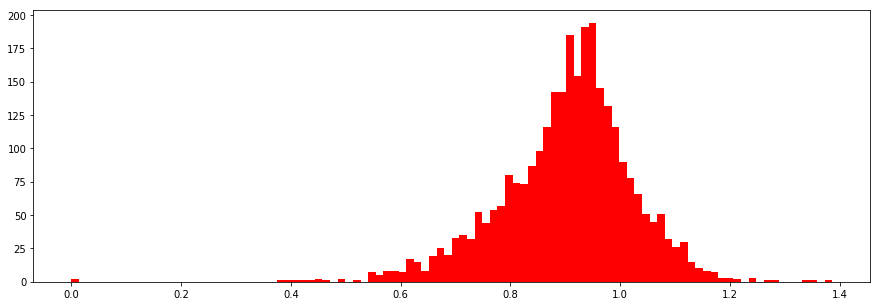

In [10]:
plt.figure(figsize=(15,5))
plt.hist(HS300['beta'], bins= 100, range= None, normed= False, weights= None, cumulative= False, 
         bottom= None, histtype= 'bar', align= 'mid', orientation= 'vertical', rwidth= None, log= False, color= 'r', 
         label='直方图', stacked= False)
plt.show()

C:\Users\Rico Li\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


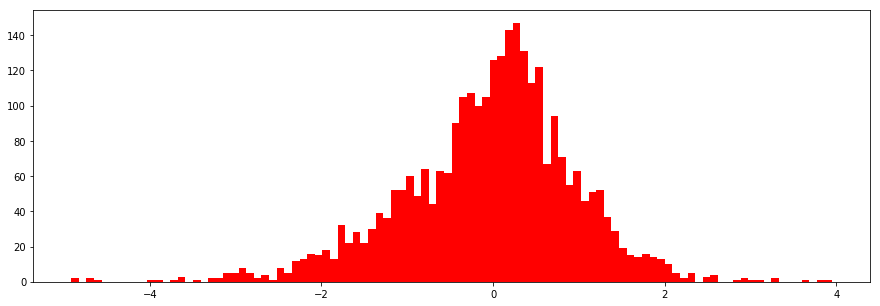

C:\Users\Rico Li\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


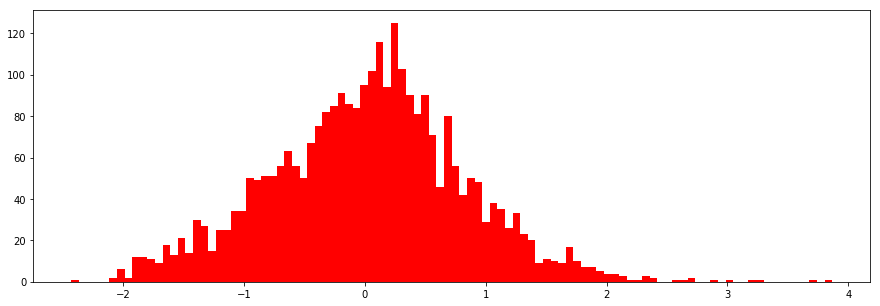

In [5]:
plt.figure(figsize=(15,5))
plt.hist(HS300['beta_norm'], bins= 100, range= None, normed= False, weights= None, cumulative= False, 
         bottom= None, histtype= 'bar', align= 'mid', orientation= 'vertical', rwidth= None, log= False, color= 'r', 
         label='直方图', stacked= False)
plt.show()

plt.figure(figsize=(15,5))
plt.hist(HS300['RSRS_R2'], bins= 100, range= None, normed= False, weights= None, cumulative= False, 
         bottom= None, histtype= 'bar', align= 'mid', orientation= 'vertical', rwidth= None, log= False, color= 'r', 
         label='直方图', stacked= False)
plt.show()


In [6]:
sta = scs.describe(HS300.beta)
stew = sta[4]
kurtosis = sta[5]

sta1 = scs.describe(HS300.beta_norm)
stew1 = sta1[4]
kurtosis1 = sta1[5]

sta2 = scs.describe(HS300.RSRS_R2)
stew2 = sta2[4]
kurtosis2 = sta2[5]

print('斜率的均值:%s' % (HS300['beta'].mean()))
print('斜率的标准差:%s' % (HS300['beta'].std()))
print('斜率的偏度:%s' % (stew))
print('斜率的峰度:%s' % (kurtosis))
print('')
print('斜率标准分的均值:%s' % (HS300['beta_norm'].mean()))
print('斜率标准分的标准差:%s' % (HS300['beta_norm'].std()))
print('斜率标准分的偏度:%s' % (stew1))
print('斜率标准分的峰度:%s' % (kurtosis1))
print('')
print('斜率标准分的均值:%s' % (HS300['RSRS_R2'].mean()))
print('斜率标准分的标准差:%s' % (HS300['RSRS_R2'].std()))
print('斜率标准分的偏度:%s' % (stew2))
print('斜率标准分的峰度:%s' % (kurtosis2))


斜率的均值:0.9028145098167284
斜率的标准差:0.12005415361416674
斜率的偏度:-0.7317857596172357
斜率的峰度:2.9155993008088927

斜率标准分的均值:-0.045590599650641106
斜率标准分的标准差:1.0058966499603323
斜率标准分的偏度:-0.521334571387076
斜率标准分的峰度:1.4226164107285708

斜率标准分的均值:0.024988941121804015
斜率标准分的标准差:0.804966101762193
斜率标准分的偏度:0.10432661427751183
斜率标准分的峰度:0.46359849059171676


In [28]:
HS300['beta_mean'] = HS300.beta.rolling(250).mean().shift(1)
for i in range(250):
    HS300.loc[i,'beta_mean'] = HS300.loc[:i-1,'beta'].mean()

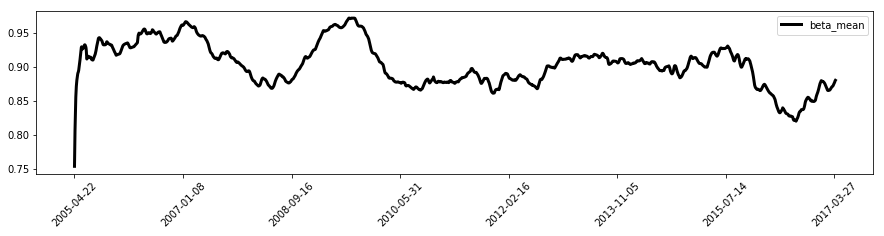

In [8]:
result = HS300.loc[10:].copy()
result = result.reset_index(drop = True)
xtick = np.arange(0,result.shape[0],int(result.shape[0]/7))
xticklabel = pd.Series(result.date[xtick])
plt.figure(figsize=(15,3))
fig = plt.axes()
plt.plot(np.arange(result.shape[0]),result.beta_mean,linewidth = 3,color = 'black')

fig.set_xticks(xtick)
fig.set_xticklabels(xticklabel,rotation = 45)
plt.legend()
plt.show()


In [37]:
def RSRS1(HS300,S1 = 1.0,S2 = 0.8):
    data  = HS300.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记
    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0]-1):
        
        # 开仓
        if data.loc[i,'beta']>S1 and position ==0:
            data.loc[i,'flag'] = 1
            data.loc[i+1,'position'] = 1
            position = 1
        # 平仓
        elif data.loc[i,'beta']<S2 and position ==1: 
            data.loc[i,'flag'] = -1
            data.loc[i+1,'position'] = 0     
            position = 0
        
        # 保持
        else:
            data.loc[i+1,'position'] = data.loc[i,'position']     
        
    data['nav'] = (1+data.close.pct_change(1).fillna(0)*data.position).cumprod() 
        
    return(data)


In [30]:
def RSRS2(HS300,S = 0.7):
    data = HS300.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记
    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0]-1):
        
        # 开仓
        if data.loc[i,'beta_norm']>S and position ==0:
            data.loc[i,'flag'] = 1
            data.loc[i+1,'position'] = 1
            position = 1
        # 平仓
        elif data.loc[i,'beta_norm']<-S and position ==1: 
            data.loc[i,'flag'] = -1
            data.loc[i+1,'position'] = 0     
            position = 0
        
        # 保持
        else:
            data.loc[i+1,'position'] = data.loc[i,'position']     
        
    data['nav'] = (1+data.close.pct_change(1).fillna(0)*data.position).cumprod() 
           
    return(data)


In [31]:
def RSRS3(HS300,S = 0.7):
    data = HS300.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记
    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0]-1):
        
        # 开仓
        if data.loc[i,'RSRS_R2']>S and position ==0:
            data.loc[i,'flag'] = 1
            data.loc[i+1,'position'] = 1
            position = 1
        # 平仓
        elif data.loc[i,'RSRS_R2']<-S and position ==1: 
            data.loc[i,'flag'] = -1
            data.loc[i+1,'position'] = 0     
            position = 0
        
        # 保持
        else:
            data.loc[i+1,'position'] = data.loc[i,'position']     
        
    data['nav'] = (1+data.close.pct_change(1).fillna(0)*data.position).cumprod() 
           
    return(data)
            


In [ ]:
def RSRS4(HS300,S = 0.7):
    data = HS300.copy()
    data['flag'] = 0 # 买卖标记
    data['position'] = 0 # 持仓标记
    position = 0 # 是否持仓，持仓：1，不持仓：0
    for i in range(1,data.shape[0]-1):
        
        # 开仓
        if data.loc[i,'beta_right']>S and position ==0:
            data.loc[i,'flag'] = 1
            data.loc[i+1,'position'] = 1
            position = 1
        # 平仓
        elif data.loc[i,'beta_right']<-S and position ==1: 
            data.loc[i,'flag'] = -1
            data.loc[i+1,'position'] = 0     
            position = 0
        
        # 保持
        else:
            data.loc[i+1,'position'] = data.loc[i,'position']     
        
    data['nav'] = (1+data.close.pct_change(1).fillna(0)*data.position).cumprod() 
           
    return(data)

In [36]:
result = RSRS1(HS300)
num = result.flag.abs().sum()/2
nav = result.nav[result.shape[0]-1]

print('交易次数 = ',num)
print('策略净值为= ',nav)

交易次数 =  45.0
策略净值为=  10.575706431363471


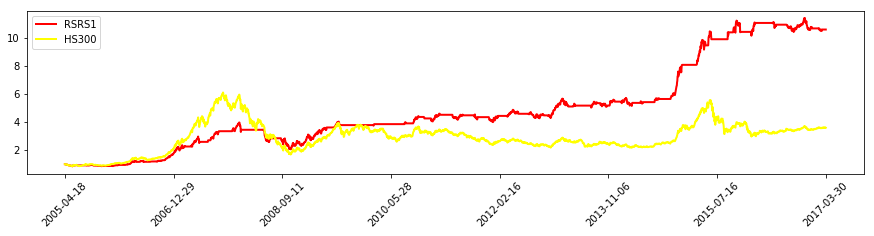

In [33]:
xtick = np.arange(0,result.shape[0],int(result.shape[0]/7))
xticklabel = pd.Series(result.date[xtick])
plt.figure(figsize=(15,3))
fig = plt.axes()
plt.plot(np.arange(result.shape[0]),result.nav,label = 'RSRS1',linewidth = 2,color = 'red')
plt.plot(np.arange(result.shape[0]),result.close/result.close[0],color = 'yellow',label = 'HS300',linewidth = 2)

fig.set_xticks(xtick)
fig.set_xticklabels(xticklabel,rotation = 45)
plt.legend()
plt.show()


In [ ]:
result2 = RSRS2(HS300)
num = result2.flag.abs().sum()/2
nav = result2.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)

In [ ]:
result3 = RSRS3(HS300)
num = result3.flag.abs().sum()/2
nav = result3.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)

In [ ]:
dateStart = datetime.date(2005,3,1)
dateEnd = datetime.date(2017,3,31)
N = 16
M = 300
HS300 = getdata(dateStart,dateEnd,N,M)
HS300 = HS300.loc[2:]
HS300 =HS300.reset_index(drop = True)

In [ ]:
result4 = RSRS4(HS300)
num = result4.flag.abs().sum()/2
nav = result4.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)

In [ ]:
xtick = np.arange(0,result.shape[0],int(result.shape[0]/7))
xticklabel = pd.Series(result.date[xtick])
plt.figure(figsize=(15,3))
fig = plt.axes()
plt.plot(np.arange(result.shape[0]),result.nav,label = 'RSRS1',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result2.nav,label = 'RSRS2',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result3.nav,label = 'RSRS3',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result4.nav,label = 'RSRS4',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result.close/result.close[0],color = 'yellow',label = 'HS300',linewidth = 2)

fig.set_xticks(xtick)
fig.set_xticklabels(xticklabel,rotation = 45)
plt.legend()
plt.show()

In [ ]:
dateStart = datetime.date(2005,3,1)
dateEnd = datetime.date(2018,8,30)
N = 18
M = 600
HS300 = getdata(dateStart,dateEnd,N,M)
HS300 = HS300.loc[2:]
HS300 =HS300.reset_index(drop = True)
HS300.head()


In [ ]:
result = RSRS1(HS300)
num = result.flag.abs().sum()/2
nav = result.nav[result.shape[0]-1]

print('交易次数 = ',num)
print('策略净值为= ',nav)


In [ ]:
result2 = RSRS2(HS300)
num = result2.flag.abs().sum()/2
nav = result2.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)


In [ ]:
result3 = RSRS3(HS300)
num = result3.flag.abs().sum()/2
nav = result3.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)

In [ ]:
dateStart = datetime.date(2005,3,1)
dateEnd = datetime.date(2018,8,30)
N = 16
M = 300
HS300 = getdata(dateStart,dateEnd,N,M)
HS300 = HS300.loc[2:]
HS300 =HS300.reset_index(drop = True)
HS300.head()

In [ ]:
result4 = RSRS4(HS300)
num = result4.flag.abs().sum()/2
nav = result4.nav[result.shape[0]-1]
ret_year = (nav - 1)
print('交易次数 = ',num)
print('策略净值为= ',nav)

In [ ]:
xtick = np.arange(0,result.shape[0],int(result.shape[0]/7))
xticklabel = pd.Series(result.date[xtick])
plt.figure(figsize=(15,3))
fig = plt.axes()
plt.plot(np.arange(result.shape[0]),result.nav,label = 'RSRS1',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result2.nav,label = 'RSRS2',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result3.nav,label = 'RSRS3',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result4.nav,label = 'RSRS4',linewidth = 2)
plt.plot(np.arange(result.shape[0]),result.close/result.close[0],color = 'yellow',label = 'HS300',linewidth = 2)

fig.set_xticks(xtick)
fig.set_xticklabels(xticklabel,rotation = 45)
plt.legend()
plt.show()
